## Analysis on Heart Disease Dataset

# Various plot for Visualization

### Quantitative:

1. Kernel Density plot
2. Histogram
3. Box plot 


### Categorical: 

1. Pie chart

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries 

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### import the dataset

In [107]:
heart=pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### size of your data

In [108]:
heart.shape

(303, 14)

### view the statistical characteristics of the data

In [109]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [110]:
heart[['age']]

,age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


In [111]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Numerical Features,Categorical Features, Alphanumeric Features

In [112]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Changing the column names

In [113]:
#Change the sex(0,1)=(female,male)
heart['sex'][heart['sex']==0]='female'
heart['sex'][heart['sex']==1]='male'
heart.head(50)

C:\Users\v-ankona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2,1


### Creating kdeplot for showing age

Text(0.5, 0, 'Age')

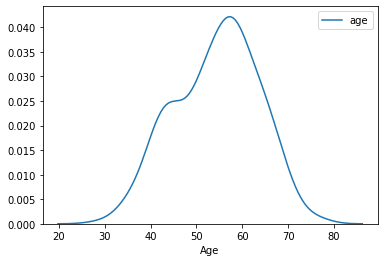

In [114]:
sns.kdeplot(heart['age'])
plt.xlabel('Age')

### Creating histogram for showing cholestrol with Number of bins 5

Text(0.5, 0, 'Cholestrol')

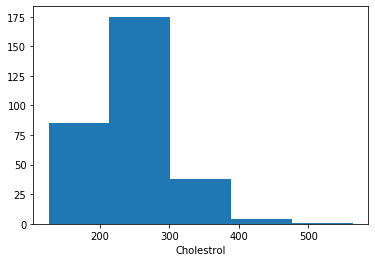

In [115]:
plt.hist(heart['chol'],bins=5)
plt.xlabel('Cholestrol')

### Creating Boxplot for showing trestbps

{'whiskers': [<matplotlib.lines.Line2D at 0x20d5712fc48>,
 'caps': [<matplotlib.lines.Line2D at 0x20d5712ffc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d57430b48>],
 'medians': [<matplotlib.lines.Line2D at 0x20d56fdaac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d56fece88>],
 'means': []}

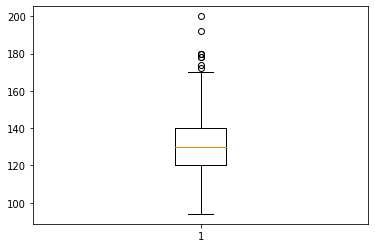

In [116]:
plt.boxplot(heart['trestbps'])

#The drak spot indicates that those are outliers.

### Creating bar plot for showing Gender and target.

Percentage of Males with Heart Disease : 56.36 and Percentage of Females with Heart Disease : 43.64


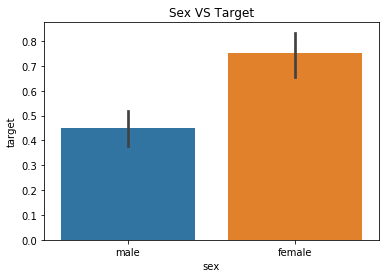

In [117]:
#draw a bar plot of target by sex
sns.barplot(heart['sex'],heart['target'])
plt.title('Sex VS Target')

#print percentages of females vs. males Heart Disease
print('Percentage of Males with Heart Disease :',round(((heart['target'][(heart['sex']=='male') & (heart['target']==1)].sum())/heart['target'][heart['target']==1].sum())*100,2),'and Percentage of Females with Heart Disease :',round(((heart['target'][(heart['sex']=='female') & (heart['target']==1)].sum())/heart['target'][heart['target']==1].sum())*100,2))

#Observation: Percentage of Males effected with Heart Disease are more compared to Females.

### Observation: Percentage of Males effected with Heart Disease are more compared to Females



###  Creating Bar plot for checking the both target vs Sex.

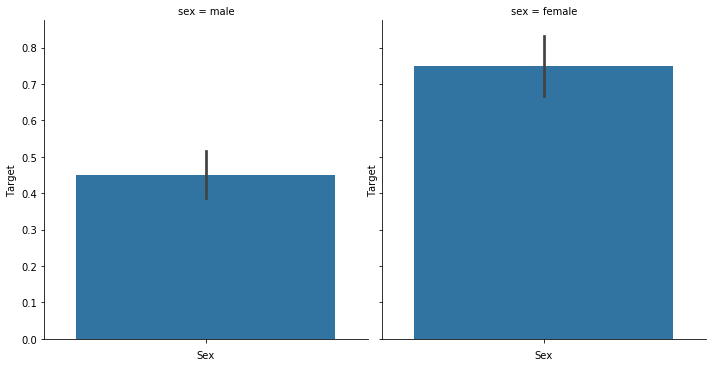

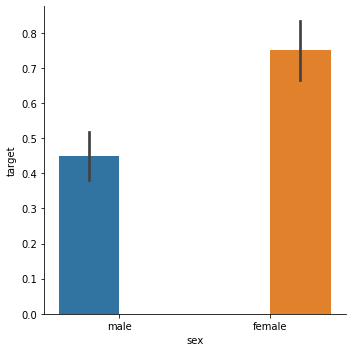

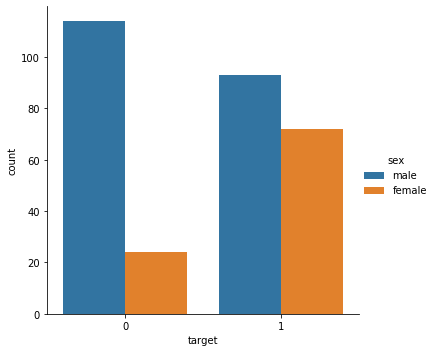

In [118]:
#create a subplot
g=sns.catplot(y='target',col='sex',data=heart,kind='bar')
g.set(xlabel='Sex',ylabel='Target')

# create bar plot using groupby
sns.catplot(x='sex',y='target',data=heart,kind='bar',hue='sex')

# create count plot
sns.catplot(x='target',data=heart,kind='count',hue='sex')
#sns.catplot(x='sex',data=heart,kind='count') # Indivudual count plot for sex
#sns.catplot(x='target',data=heart,kind='count') # Indivudual count plot for target

### Creating Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not

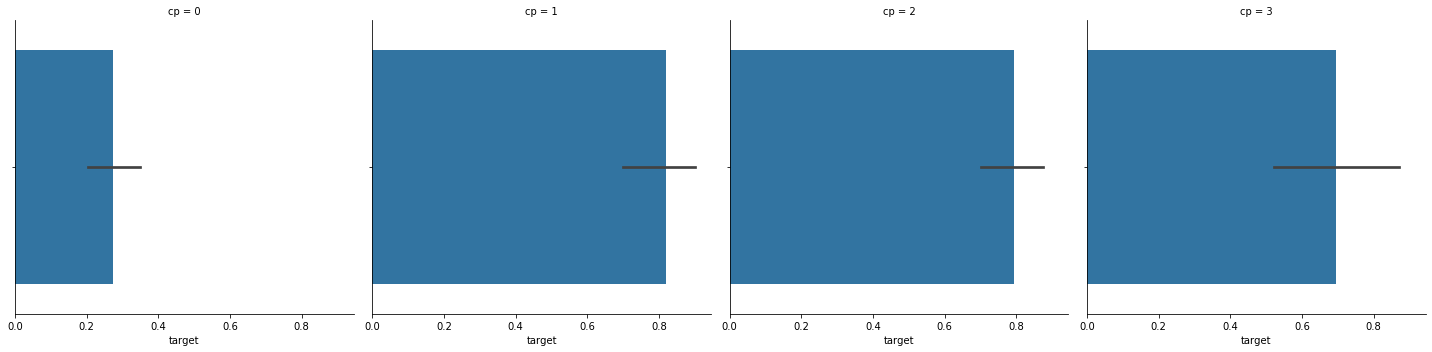

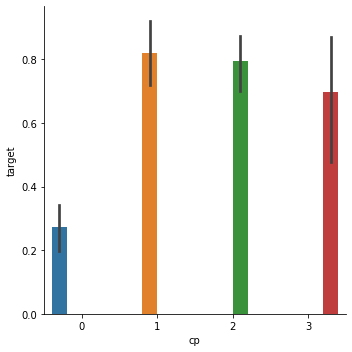

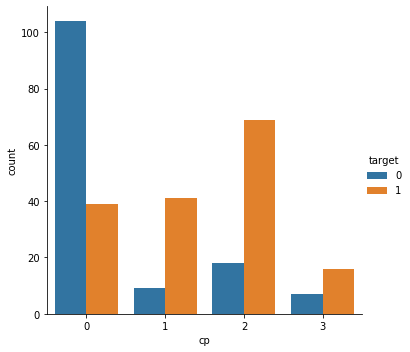

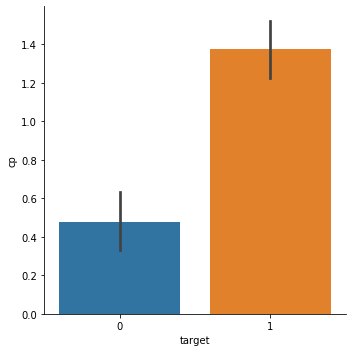

In [119]:
# create subplot plot
sns.catplot(x='target',data=heart,kind='bar',col='cp')

# create bar plot using groupby
sns.catplot(kind='bar',data=heart,hue='cp',x='cp',y='target')

# create count plot
sns.catplot(x='cp',data=heart,kind='count',hue='target')
#sns.catplot(x='cp',data=heart,kind='count')  # Indivudual count plot for cp
#sns.catplot(x='target',data=heart,kind='count')  # Indivudual count plot for target

sns.catplot(x='target',y='cp',kind='bar',data=heart)

### Creating violinplot plot for checking the fasting_blood_sugar and Age vs target'

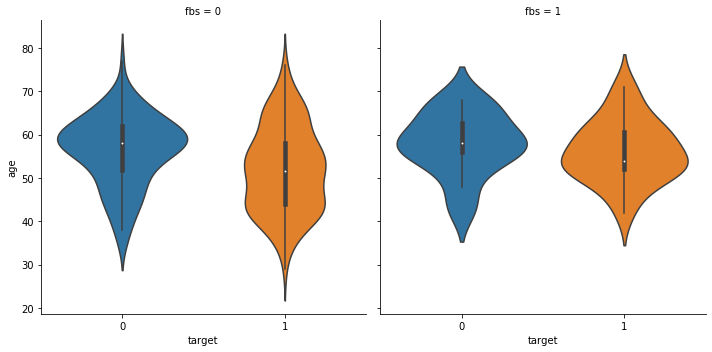

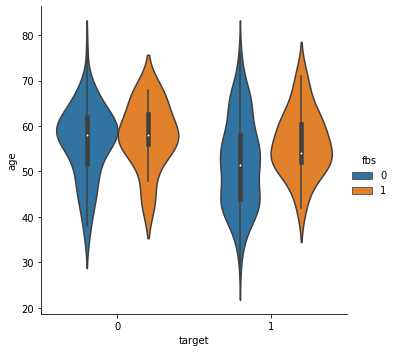

In [120]:
# create subplot plot
sns.catplot(x='target',y='age',data=heart,kind='violin',col='fbs')

# create violinplot plot using groupby
sns.catplot(x='target',y='age',kind='violin',data=heart,hue='fbs')


## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### creating a box plot for Sex & Age 

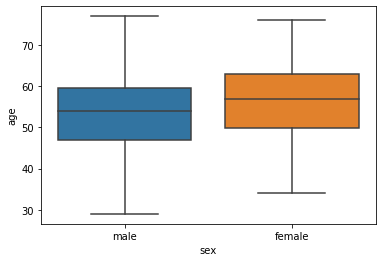

In [121]:
# create boxplot
sns.boxplot(x='sex',y='age',data=heart)

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### Creating a Stacked bar chart for showing target & Sex

sex     female  male
target              
0           24   114
1           72    93


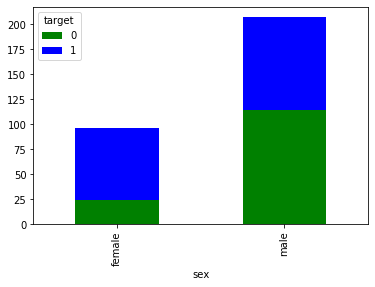

In [122]:
#create crosstab
print(pd.crosstab(heart['target'],heart['sex']))

df = heart.groupby(['sex','target'])['sex'].count().unstack('target')
df.plot(kind='bar', stacked=True, color=['green', 'blue'])


### Creating a scatter plot for showing age & st_depression

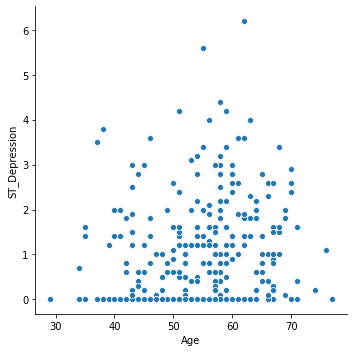

In [123]:
g=sns.relplot(x='age',y='oldpeak',data=heart,kind='scatter')
g.set(xlabel='Age',ylabel='ST_Depression')

# Overall  Observation
   